# HW4: Use Clustering to Solve a Mystery in History

Anjali Shahi

## Loading the requied packages

In [1]:
import sys

import sklearn
import pandas as pd
#!pip install nbconvert
import numpy as np
import os
import matplotlib.pyplot as plt
from scipy.spatial import distance_matrix
from sklearn.preprocessing import StandardScaler
import nbconvert
#!pip install plotly
import plotly.graph_objects as go
#!pip install pyppeteer
from sklearn.cluster import KMeans


## Data Exploration

In [5]:
data = pd.read_csv('HW4-data-fedPapers85.csv')
data.head()

,author,filename,a,all,also,an,and,any,are,as,...,was,were,what,when,which,who,will,with,would,your
0,dispt,dispt_fed_49.txt,0.280,0.052,0.009,0.096,0.358,0.026,0.131,0.122,...,0.009,0.017,0.000,0.009,0.175,0.044,0.009,0.087,0.192,0.0
1,dispt,dispt_fed_50.txt,0.177,0.063,0.013,0.038,0.393,0.063,0.051,0.139,...,0.051,0.000,0.000,0.000,0.114,0.038,0.089,0.063,0.139,0.0
2,dispt,dispt_fed_51.txt,0.339,0.090,0.008,0.030,0.301,0.008,0.068,0.203,...,0.008,0.015,0.008,0.000,0.105,0.008,0.173,0.045,0.068,0.0
3,dispt,dispt_fed_52.txt,0.270,0.024,0.016,0.024,0.262,0.056,0.064,0.111,...,0.087,0.079,0.008,0.024,0.167,0.000,0.079,0.079,0.064,0.0
4,dispt,dispt_fed_53.txt,0.303,0.054,0.027,0.034,0.404,0.040,0.128,0.148,...,0.027,0.020,0.020,0.007,0.155,0.027,0.168,0.074,0.040,0.0


In [6]:
data.shape

(85, 72)

Data has 85 rows and 72 columns
The attributes are author and filename along with feature value of all words in the documents
Feature value is the number of occurences of a word divided by the total number of words

In [7]:
#Check for missing values
data.isna().sum()

author      0
filename    0
a           0
all         0
also        0
           ..
who         0
will        0
with        0
would       0
your        0
Length: 72, dtype: int64

In [8]:
data.author.unique()


array(['dispt', 'Hamilton', 'HM', 'Jay', 'Madison'], dtype=object)

There are 4 authors in total and the files with dispt authors are the target data which we need to find out if 
they were authored by Hamilton or Madison

In [9]:
#Verifying if HM is same as Hamilton

data.loc[data['author'] =='Hamilton'].head()

,author,filename,a,all,also,an,and,any,are,as,...,was,were,what,when,which,who,will,with,would,your
11,Hamilton,Hamilton_fed_1.txt,0.213,0.083,0.000,0.083,0.343,0.056,0.111,0.093,...,0.000,0.000,0.000,0.009,0.158,0.074,0.222,0.046,0.019,0.074
12,Hamilton,Hamilton_fed_11.txt,0.369,0.070,0.006,0.076,0.411,0.023,0.053,0.117,...,0.000,0.012,0.012,0.012,0.147,0.029,0.094,0.129,0.270,0.000
13,Hamilton,Hamilton_fed_12.txt,0.305,0.047,0.007,0.068,0.386,0.047,0.102,0.108,...,0.000,0.000,0.007,0.000,0.156,0.007,0.074,0.122,0.149,0.000
14,Hamilton,Hamilton_fed_13.txt,0.391,0.045,0.015,0.030,0.270,0.045,0.060,0.090,...,0.000,0.000,0.000,0.045,0.165,0.045,0.135,0.150,0.210,0.000
15,Hamilton,Hamilton_fed_15.txt,0.327,0.096,0.000,0.086,0.356,0.014,0.086,0.072,...,0.014,0.038,0.014,0.019,0.264,0.029,0.091,0.086,0.062,0.010


In [10]:
data.loc[data['author'] =='HM']
#Both author's documents are stored under different file names so we can't assume they are the same

,author,filename,a,all,also,an,and,any,are,as,...,was,were,what,when,which,who,will,with,would,your
62,HM,HM_fed_18.txt,0.229,0.040,0.000,0.034,0.532,0.013,0.013,0.081,...,0.189,0.108,0.000,0.020,0.081,0.074,0.007,0.074,0.040,0.0
63,HM,HM_fed_19.txt,0.186,0.034,0.000,0.062,0.566,0.041,0.117,0.069,...,0.090,0.034,0.007,0.000,0.214,0.041,0.007,0.145,0.028,0.0
64,HM,HM_fed_20.txt,0.225,0.054,0.018,0.045,0.494,0.000,0.117,0.090,...,0.063,0.000,0.000,0.027,0.117,0.027,0.036,0.072,0.009,0.0


## Data Manipulation

Subsetting the dataset to isolate data of files authored by only Hamilton, Madison and disputed articles

In [11]:

essay_data = data.loc[(data['author'] =='Hamilton') | (data['author'] == 'Madison') | (data['author'] == 'dispt')]
essay_data.shape

(77, 72)

In [13]:
#author = essay_data.author.unique()
author = ['Hamilton','Madison']
author

['Hamilton', 'Madison']

In [14]:
#Remove columns filename and author 
essay_data = essay_data.drop(columns = ['filename','author'])


In [15]:
essay_data.head()

,a,all,also,an,and,any,are,as,at,be,...,was,were,what,when,which,who,will,with,would,your
0,0.280,0.052,0.009,0.096,0.358,0.026,0.131,0.122,0.017,0.411,...,0.009,0.017,0.000,0.009,0.175,0.044,0.009,0.087,0.192,0.0
1,0.177,0.063,0.013,0.038,0.393,0.063,0.051,0.139,0.114,0.393,...,0.051,0.000,0.000,0.000,0.114,0.038,0.089,0.063,0.139,0.0
2,0.339,0.090,0.008,0.030,0.301,0.008,0.068,0.203,0.023,0.474,...,0.008,0.015,0.008,0.000,0.105,0.008,0.173,0.045,0.068,0.0
3,0.270,0.024,0.016,0.024,0.262,0.056,0.064,0.111,0.056,0.365,...,0.087,0.079,0.008,0.024,0.167,0.000,0.079,0.079,0.064,0.0
4,0.303,0.054,0.027,0.034,0.404,0.040,0.128,0.148,0.013,0.344,...,0.027,0.020,0.020,0.007,0.155,0.027,0.168,0.074,0.040,0.0


## Scaling the data

Scaling is used for making data points generalized so that the distance between them will be lower.

In [16]:
# Using StandardScaler from sklearn
scaler = StandardScaler()
scaled_features = scaler.fit_transform(essay_data)
scaled_features = pd.DataFrame(scaled_features)

## K-means

The objective of K-means is to group similar data points together and discover underlying patterns. To achieve this objective, K-means looks for a fixed number (k) of clusters in a dataset.

Identifying k-value for clusters by plotting an 'Elbow' curve.
The elbow method consists of plotting the explained variation(Inertia) as a function of the number of clusters, and picking the elbow of the curve as the number of clusters to use.

In [1]:
inertia = []
for i in range(1,11):
    kmeans = KMeans(
        n_clusters=i, init="k-means++",
        n_init=10,
        tol=1e-04, random_state=42
    )
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)
fig = go.Figure(data=go.Scatter(x=np.arange(1,11),y=inertia))
fig.update_layout(title="Inertia vs Cluster Number",xaxis=dict(range=[0,11],title="Cluster Number"),
                  yaxis={'title':'Inertia'},
                 annotations=[
        dict(
            x=3,
            y=inertia[2],
            xref="x",
            yref="y",
            text="Elbow!",
            showarrow=True,
            arrowhead=7,
            ax=20,
            ay=-40
        )
    ])

NameError: name 'KMeans' is not defined

The elbow is at 3 so the number of clusters can be taken as 3 i.e. k=3

## Principal Component Analysis

In [ ]:
#Performing PCA for dimensionality reduction

Principal component analysis (PCA) is a technique for reducing the dimensionality of datasets, increasing interpretability but at the same time minimizing information loss. 

In [191]:
from sklearn import decomposition
from sklearn.decomposition import PCA

# Using PCA from sklearn PCA
pca = decomposition.PCA(n_components=2)
X_centered = scaled_features - scaled_features.mean(axis=0)
pca.fit(X_centered)
X_pca = pca.transform(X_centered)

X_pca.shape

(77, 2)

Plotting the two components obtained after performing PCA

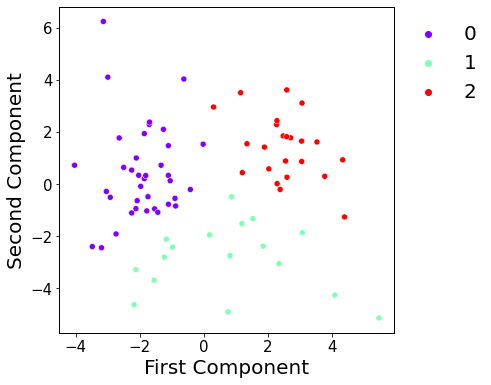

In [193]:
import seaborn as sns

fig, ax = plt.subplots(figsize=(6, 6))

mpl.rcParams['font.size'] = 15
mpl.rcParams['axes.linewidth'] = 1

sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=y, palette='rainbow', ax=ax)

ax.set_xlabel("First Component", fontsize=20)
ax.set_ylabel("Second Component", fontsize=20)

ax.legend(frameon=False, 
          loc= 1, 
          bbox_to_anchor=(1.3, 1), 
          fontsize=20)

Create kmeans model and fit data obtained after dimensionality reduction to the model

In [192]:
k = 3
kmeans = KMeans(n_clusters=k, random_state=42)
y = kmeans.fit_predict(X_pca)

Create new dataframe with original features and add PCA component scores and assigned clusters

In [205]:
df_pca_kmeans  = pd.concat([og_data.reset_index(drop=True),pd.DataFrame(X_pca)],axis=1)

df_pca_kmeans.columns.values[-2:] = ['Component 1', 'Component 2']

df_pca_kmeans['Segment K-means PCA'] = kmeans.labels_

s = df_pca_kmeans.loc[df_pca_kmeans['author']=='dispt']

s['Segment K-means PCA'].value_counts()


2    9
1    2
Name: Segment K-means PCA, dtype: int64

/Users/anjali/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



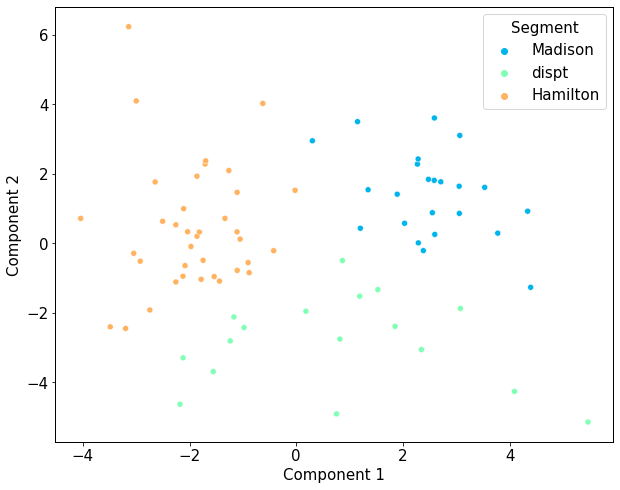

In [197]:

df_pca_kmeans['Segment'] = df_pca_kmeans['Segment K-means PCA'].map({0:'Hamilton',1:'dispt',2:'Madison'})


x_axis = df_pca_kmeans['Component 1']
y_axis = df_pca_kmeans['Component 2']
plt.figure(figsize=(10,8))

sns.scatterplot(x_axis,y_axis,hue= df_pca_kmeans['Segment'], palette = 'rainbow')
plt.show()

From this output we can see that the disputed articles cluster is closer to the Madison articles
cluster and hence we can conclud the disputed article were written by Madison.

## Madison!

## HCA



In [210]:
# Import the dendrogram function and the ward clustering function from SciPy
from scipy.cluster.hierarchy import dendrogram, ward
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.datasets import make_blobs
from scipy.cluster.hierarchy import dendrogram
from sklearn.cluster import AgglomerativeClustering

Text(0, 0.5, 'Cluster distance')

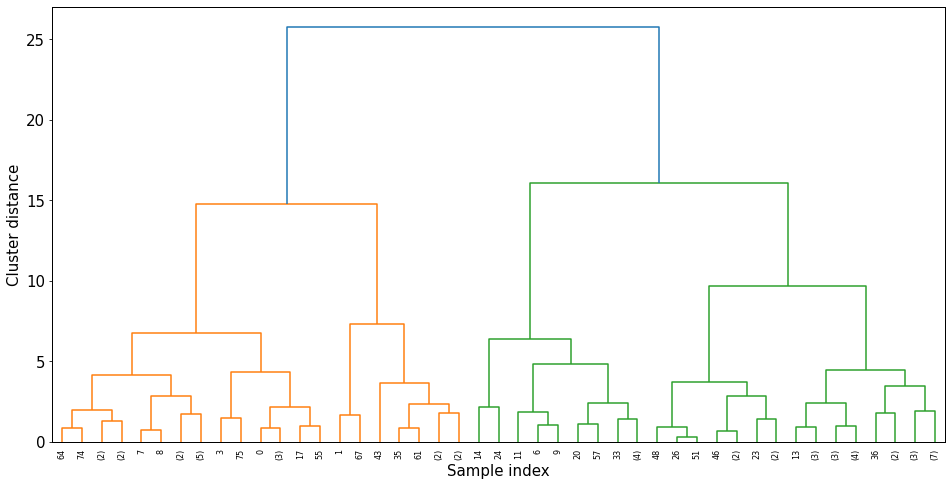

In [227]:
#Plotting dendograms

X = X_pca
linkage_array = linkage(X,'ward')
# Now we plot the dendrogram for the linkage_array containing the distances
# between clusters

# mark the cuts in the tree that signify two or three clusters
plt.figure(figsize=(16, 8))

dendrogram(linkage_array,truncate_mode="level",p=5)

plt.xlabel("Sample index")
plt.ylabel("Cluster distance")

In [232]:
# setting distance_threshold=0 ensures we compute the full tree.
model = AgglomerativeClustering(n_clusters=3)

model = model.fit(X)

model.fit_predict(X)
labels = model.labels_

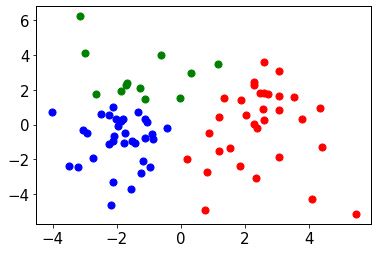

In [233]:
plt.scatter(X[labels==0, 0], X[labels==0, 1], s=50, marker='o', color='red')
plt.scatter(X[labels==1, 0], X[labels==1, 1], s=50, marker='o', color='blue')
plt.scatter(X[labels==2, 0], X[labels==2, 1], s=50, marker='o', color='green')
plt.show()

In [234]:
# setting distance_threshold=0 ensures we compute the full tree.
model = AgglomerativeClustering(n_clusters=2)

model = model.fit(X)

model.fit_predict(X)
labels = model.labels_

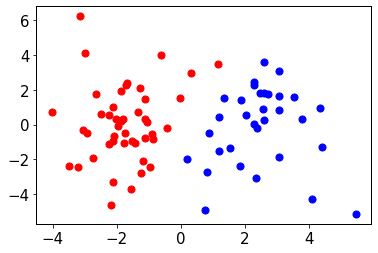

In [235]:
plt.scatter(X[labels==0, 0], X[labels==0, 1], s=50, marker='o', color='red')
plt.scatter(X[labels==1, 0], X[labels==1, 1], s=50, marker='o', color='blue')
#plt.scatter(X[labels==2, 0], X[labels==2, 1], s=50, marker='o', color='green')
plt.show()

For the joint authored essays we subset the original data again,scale and apply pca to it and finally 
apply HCA model

In [238]:
#Where are joint authored essays located?

joint_auth = data[data['author']!='Jay']
joint_auth = joint_auth.drop(columns = ['filename','author'])

#Scaling

scaler = StandardScaler()
scaled_features2 = scaler.fit_transform(joint_auth)
scaled_features2 = pd.DataFrame(scaled_features2)

In [240]:
scaled_features2.head()

,0,1,2,3,4,5,6,7,8,9,...,60,61,62,63,64,65,66,67,68,69
0,-0.309923,-0.079427,0.265812,0.885350,-0.076167,-0.690184,1.630826,-0.004439,-1.078797,1.259883,...,-0.580566,-0.133668,-1.159884,-0.167434,0.327748,0.547474,-1.365275,0.321235,1.344712,-0.187472
1,-1.789509,0.383459,0.772121,-1.175877,0.370933,0.919701,-0.765795,0.459998,2.687044,1.050363,...,0.862260,-0.979199,-1.159884,-0.864269,-1.147723,0.288059,-0.123234,-0.610444,0.567930,-0.187472
2,0.537607,1.519634,0.139235,-1.460184,-0.804299,-1.473371,-0.256513,2.208468,-0.845858,1.993202,...,-0.614919,-0.233143,-0.418300,-0.864269,-1.365415,-1.009017,1.180910,-1.309203,-0.472664,-0.187472
3,-0.453572,-1.257683,1.151853,-1.673414,-1.302496,0.615128,-0.376344,-0.304958,0.435304,0.724444,...,2.098969,2.950032,-0.418300,0.993958,0.134244,-1.354903,-0.278489,0.010675,-0.531290,-0.187472
4,0.020470,0.004734,2.544202,-1.318030,0.511449,-0.081038,1.540953,0.705876,-1.234089,0.480004,...,0.037788,0.015543,0.694076,-0.322286,-0.156013,-0.187535,1.103282,-0.183424,-0.883040,-0.187472


In [242]:
#PCA


# Using PCA from sklearn PCA
pca = decomposition.PCA(n_components=2)
X_centered = scaled_features2 - scaled_features2.mean(axis=0)
pca.fit(X_centered)
X_pca2 = pca.transform(X_centered)
X_pca2.shape

(80, 2)

In [254]:
X = X_pca2
model = AgglomerativeClustering(n_clusters=3)

model = model.fit(X)

model.fit_predict(X)
labels = model.labels_

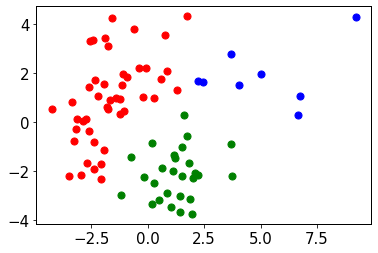

In [255]:
plt.scatter(X[labels==0, 0], X[labels==0, 1], s=50, marker='o', color='red')
plt.scatter(X[labels==1, 0], X[labels==1, 1], s=50, marker='o', color='blue')
plt.scatter(X[labels==2, 0], X[labels==2, 1], s=50, marker='o', color='green')
plt.scatter(X[labels==3, 0], X[labels==3, 1], s=50, marker='o', color='yellow')
plt.show()

In [252]:
X = X_pca2
model = AgglomerativeClustering(n_clusters=2)

model = model.fit(X)

model.fit_predict(X)
labels = model.labels_

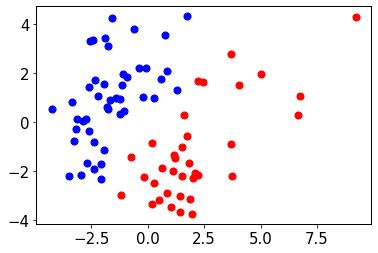

In [253]:
plt.scatter(X[labels==0, 0], X[labels==0, 1], s=50, marker='o', color='red')
plt.scatter(X[labels==1, 0], X[labels==1, 1], s=50, marker='o', color='blue')
plt.scatter(X[labels==2, 0], X[labels==2, 1], s=50, marker='o', color='green')
plt.scatter(X[labels==3, 0], X[labels==3, 1], s=50, marker='o', color='yellow')
plt.show()

The number of clusters in this model are taken as 2 and the scatter plot of the result is created.
Majority of the data points of the joint authored files get assigned to the Madison data point clusters meaning
the joint authored essays are more influenced by Madison's style of writing.